In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Preprocessing

In [2]:
data = pd.read_csv('dataset\sentiment_analysis.csv')

In [3]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#### Text Preprocessing 

1.Convert Uppercase to Lowercase

2.Remove Links

3.Remove Punctuations

4.Remove Numbers

5.Remove Stopwords

6.Stemming

Eg : creating,creative,creates = create

In [7]:
import re
import string

convert uppercase to lowercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r"http\S+|www\S+|https\S+", "", word, flags=re.MULTILINE) for word in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuations

In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [13]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove Numbers

In [14]:
data["tweet"]= data['tweet'].str.replace('\d+','', regex=True)

Remove stopwords

In [15]:
import nltk

In [16]:
nltk.download('stopwords', download_dir='static\model')

[nltk_data] Downloading package stopwords to static\model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
with open('static\model\corpora\stopwords\english', 'r') as file:
    sw = file.read().splitlines()

In [18]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [20]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [23]:
data.shape

(7920, 3)

#### Building Vacabulary

In [24]:
from collections import Counter
vocab = Counter()

In [25]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [26]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [27]:
tokens = [key for key in vocab if vocab[key] > 10]

In [28]:
len(tokens)

1146

In [29]:
def save_vocab(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

In [30]:
save_vocab(tokens, 'static/model/vocabulary.txt')

In [31]:
x = data["tweet"]
y = data["label"]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
x_train.shape

(6336,)

In [34]:
x_test.shape

(1584,)

In [35]:
y_train.shape

(6336,)

#### Vectorization

In [36]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))  
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split(): 
                sentence_list[i] = 1 
        
        vectorized_list.append(sentence_list) 
    
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [37]:
vectorized_x_train = vectorizer(x_train, tokens)

In [38]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
vectorized_x_test = vectorizer(x_test, tokens)

In [40]:
y_test

119     0
1799    0
5555    0
7389    0
7913    1
       ..
7909    0
6378    0
5213    0
557     0
5723    0
Name: label, Length: 1584, dtype: int64

In [41]:
y_train.value_counts()

label
0    4699
1    1637
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x220323ae0d0>,
 [Text(-0.7571108237781816, 0.7979869676366421, 'Positive'),
  Text(0.7571108935404179, -0.7979869014479061, 'Negative')])

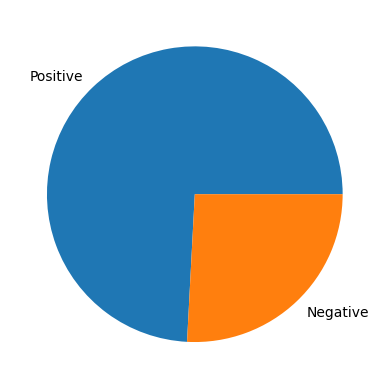

In [42]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9398, 1146) (9398,)


In [44]:
y_train_smote.value_counts()

label
1    4699
0    4699
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x220309c0950>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Negative')])

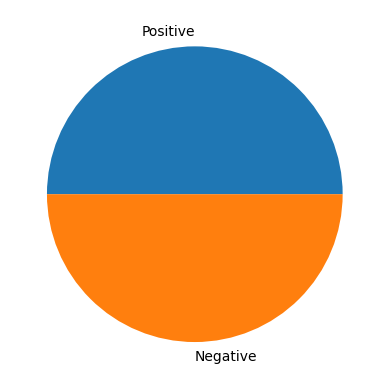

In [45]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")


#### Logistic Regression

In [49]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [50]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [51]:
y_train_pred

array([1, 0, 0, ..., 1, 1, 1])

In [52]:
y_train_smote

0       1
1       0
2       0
3       1
4       0
       ..
9393    1
9394    1
9395    1
9396    1
9397    1
Name: label, Length: 9398, dtype: int64

In [53]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.968
	F1-Score = 0.942


In [55]:
y_test_pred = lr.predict(vectorized_x_test)

In [57]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.859
	Precision = 0.691
	Recall = 0.771
	F1-Score = 0.729


#### Naive Bayes

In [58]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.909
	Precision = 0.871
	Recall = 0.961
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.876
	Precision = 0.684
	Recall = 0.923
	F1-Score = 0.786


#### Desicion Tree

In [59]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.853
	Precision = 0.701
	Recall = 0.699
	F1-Score = 0.7


#### Random Forest

In [60]:
fr = RandomForestClassifier()
fr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = fr.predict(vectorized_x_train_smote)

y_test_pred = fr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.878
	Precision = 0.775
	Recall = 0.707
	F1-Score = 0.739


#### SVM

In [61]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.964
	Recall = 0.996
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.884
	Precision = 0.759
	Recall = 0.776
	F1-Score = 0.767


In [62]:
import pickle

In [64]:
with open('static/model/model.pickle', 'wb') as file:
    [pickle.dump(lr, file)]

In [65]:
with open('static/model/model1.pickle', 'wb') as file:
    [pickle.dump(mnb, file)]

In [66]:
with open('static/model/model2.pickle', 'wb') as file:
    [pickle.dump(dt, file)]